<a href="https://colab.research.google.com/github/williamlidberg/RIP-Nature/blob/main/RIP_Nature_Results_new_Finish_streams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A comparison of riparian buffer zones across New Brunswick, Sweden and Finland

## Load data

In [1]:
import pandas as pd
sweden_harvested = pd.read_csv('https://github.com/williamlidberg/RIP-Nature/blob/main/Results/sweden_harvested_buffers.csv?raw=true',index_col=0)
sweden_reference = pd.read_csv('https://github.com/williamlidberg/RIP-Nature/blob/main/Results/sweden_reference_buffers.csv?raw=true',index_col=0)

finland_harvested = pd.read_csv('https://github.com/williamlidberg/RIP-Nature/blob/main/Results/finland_harvested_buffers.csv?raw=true',index_col=0)
finland_reference = pd.read_csv('https://github.com/williamlidberg/RIP-Nature/blob/main/Results/finland_reference_buffers.csv?raw=true',index_col=0)

new_brunswick_harvested = pd.read_csv('https://github.com/williamlidberg/RIP-Nature/blob/main/Results/nb_harvested_buffers.csv?raw=true',index_col=0)
new_brunswick_reference = pd.read_csv('https://github.com/williamlidberg/RIP-Nature/blob/main/Results/nb_reference_buffers.csv?raw=true',index_col=0)

In [2]:
sweden_harvested.head()

,FID_,COUNT,AREA,SUM
0,0,85.0,340.0,0.0
1,1,294.0,1176.0,218.0
2,2,1749.0,6996.0,642.0
3,3,620.0,2480.0,410.0
4,4,1349.0,5396.0,494.0




*   COUNT is the number of 2 m x 2 m cells within the buffer polygon
*   Area in square meters of the buffer polygon
*   SUM is the number of canopy cells above 5 m. multiply it by to get area in square meters






In [3]:
finland_harvested.head()

,ASTA_ID,post_raste,vuosi,F5m_sum,sum_total,Canopy__pe,Join_Count,TARGET_FID,JOIN_FID,Id,...,datasource,creationti,updatetime,geometry_L,geometry_A,year,Shape_Leng,Shape_Area,SplitYear,ASTA_ID_1
0,0,9455,2009,294,428,"68,69158878500",1,0,906,0,...,0,2015-06-09,2015-06-09,"0,00000000000","0,00000000000",2008,"405,35392764800","6518,01764812000",2008,"0,00000000000"
1,0,9456,2013,307,426,"72,06572769950",1,0,906,0,...,0,2015-06-09,2015-06-09,"0,00000000000","0,00000000000",2008,"405,35392764800","6518,01764812000",2008,"0,00000000000"
2,0,9457,2021,318,423,"75,17730496450",1,0,906,0,...,0,2015-06-09,2015-06-09,"0,00000000000","0,00000000000",2008,"405,35392764800","6518,01764812000",2008,"0,00000000000"
3,1,9458,2009,1158,1762,"65,72077185020",1,1,905,0,...,0,2015-06-09,2015-06-09,"0,00000000000","0,00000000000",2007,"292,64810969900","4994,98001563000",2007,"1,00000000000"
4,1,9459,2013,0,0,"0,00000000000",1,1,905,0,...,0,2015-06-09,2015-06-09,"0,00000000000","0,00000000000",2007,"292,64810969900","4994,98001563000",2007,"1,00000000000"


The post harvest data needs to be selected based on scanning year and cutting year.

*   ASTA_ID is the Id of the buffer polygon
*   vuosi = lidar scan year
*   year = year of harvest
*   5m_sum = number of pixels over 5 m within the polygon
*   sum_total = number of pixels within the polygon in total
*   canopy cover in the polygon


For example ASTA_ID 0 were scanned 2009, 2013 and 2021. First buffers which were scanned after harvesting was seelected then the maximum post harvest year were selected.




In [4]:
# Finland harvested
finland_real_harvested = finland_harvested[finland_harvested.vuosi > finland_harvested.year]
finland_harvested_latest_scan = finland_real_harvested.loc[finland_real_harvested.groupby('ASTA_ID')['year'].idxmax()]

With the pre-harvest data it is important to only use data from the year before harvesting. Note that Cutting_ye is the column that represents time of harvesting. and vuosi is time of lidar scan

In [5]:
finland_reference.head()

,ASTA_ID,pre_raster,vuosi,F5m_sum,sum_total,canopy_per,Join_Count,TARGET_FID,JOIN_FID,OBJECTID_1,...,standarriv,standarr_1,regenera_5,datasource,creationti,updatetime,Shape_Leng,Shape_Area,Cutting_ye,ASTA_ID_1
0,0,1,2009,1567,2243,"69,86179224",1,0,1,244,...,2017-02-15,2,NaN,0,2017-02-26,2017-02-26,"399,4500958","7192,65015",2017,0
1,0,2,2015,1452,2285,"63,54485777",1,0,1,244,...,2017-02-15,2,NaN,0,2017-02-26,2017-02-26,"399,4500958","7192,65015",2017,0
2,0,3,2017,1049,2293,"45,74792848",1,0,1,244,...,2017-02-15,2,NaN,0,2017-02-26,2017-02-26,"399,4500958","7192,65015",2017,0
3,0,4,2020,960,2286,"41,99475066",1,0,1,244,...,2017-02-15,2,NaN,0,2017-02-26,2017-02-26,"399,4500958","7192,65015",2017,0
4,3,5,2009,2706,2922,"92,60780287",1,3,23,1806,...,2016-07-12,2,NaN,0,2016-07-23,2016-07-23,"350,924575","4629,651618",2016,3


Select data that were scanned before harvesting to use as reference.

In [6]:
finland_real_reference = finland_reference[finland_reference.vuosi < finland_reference.Cutting_ye]
finland_reference_latest_scan = finland_real_reference.loc[finland_real_reference.groupby('ASTA_ID')['vuosi'].idxmax()]

In [7]:
finland_reference_latest_scan.head()

,ASTA_ID,pre_raster,vuosi,F5m_sum,sum_total,canopy_per,Join_Count,TARGET_FID,JOIN_FID,OBJECTID_1,...,standarriv,standarr_1,regenera_5,datasource,creationti,updatetime,Shape_Leng,Shape_Area,Cutting_ye,ASTA_ID_1
1,0,2,2015,1452,2285,"63,54485777",1,0,1,244,...,2017-02-15,2,NaN,0,2017-02-26,2017-02-26,"399,4500958","7192,65015",2017,0
8,1,9,2015,1044,1490,"70,06711409",1,1,20,1711,...,2016-07-12,2,NaN,0,2016-07-23,2016-07-23,"285,5028189","4702,873465",2016,1
9,2,10,2015,82,273,"30,03663004",1,2,22,1803,...,2016-02-24,2,NaN,0,2016-03-06,2016-03-06,"449,4836281","10894,22482",2016,2
7,3,8,2015,2556,2874,"88,93528184",1,3,23,1806,...,2016-07-12,2,NaN,0,2016-07-23,2016-07-23,"350,924575","4629,651618",2016,3
26,4,27,2015,821,951,"86,33017876",1,4,25,7261,...,2017-01-27,2,NaN,0,2017-02-07,2017-02-07,"528,2039883","12425,32575",2017,4


For each bufferzone, devide the number of pixels with canopy above 5m with all pixels in that zone.

In [8]:
import numpy as np
# Sweden
sweden_harvested['canopy_coverage'] = ((sweden_harvested['SUM'])  / sweden_harvested['COUNT']) *100
sweden_reference['canopy_coverage'] = ((sweden_reference['SUM']) / sweden_reference['COUNT']) *100

# New Brunswick
new_brunswick_harvested['canopy_coverage'] = ((new_brunswick_harvested['SUM']) / new_brunswick_harvested['COUNT']) *100
new_brunswick_reference['canopy_coverage'] = ((new_brunswick_reference['SUM']) / new_brunswick_reference['COUNT']) *100

# Finland
finland_harvested['canopy_coverage'] = (finland_harvested_latest_scan['F5m_sum']/finland_harvested_latest_scan['sum_total']*100)
finland_reference['canopy_coverage'] = (finland_reference_latest_scan['F5m_sum']/finland_reference_latest_scan['sum_total']*100)


In [9]:
print(finland_reference['canopy_coverage'].mean(),'finland reference')
print(finland_harvested['canopy_coverage'].mean(),'finland harvested')

print(sweden_reference['canopy_coverage'].mean(), 'sweden reference')
print(sweden_harvested['canopy_coverage'].mean(), 'sweden harvested')

print(new_brunswick_reference['canopy_coverage'].mean(), 'new_brunswick reference')
print(new_brunswick_harvested['canopy_coverage'].mean(), 'new_brunswick harvested')

83.32821237281786 finland reference
63.4193652635386 finland harvested
76.00306313989744 sweden reference
45.55812002293288 sweden harvested
94.39184308060406 new_brunswick reference
86.22327917990278 new_brunswick harvested


## Plot distribution

# Only lines

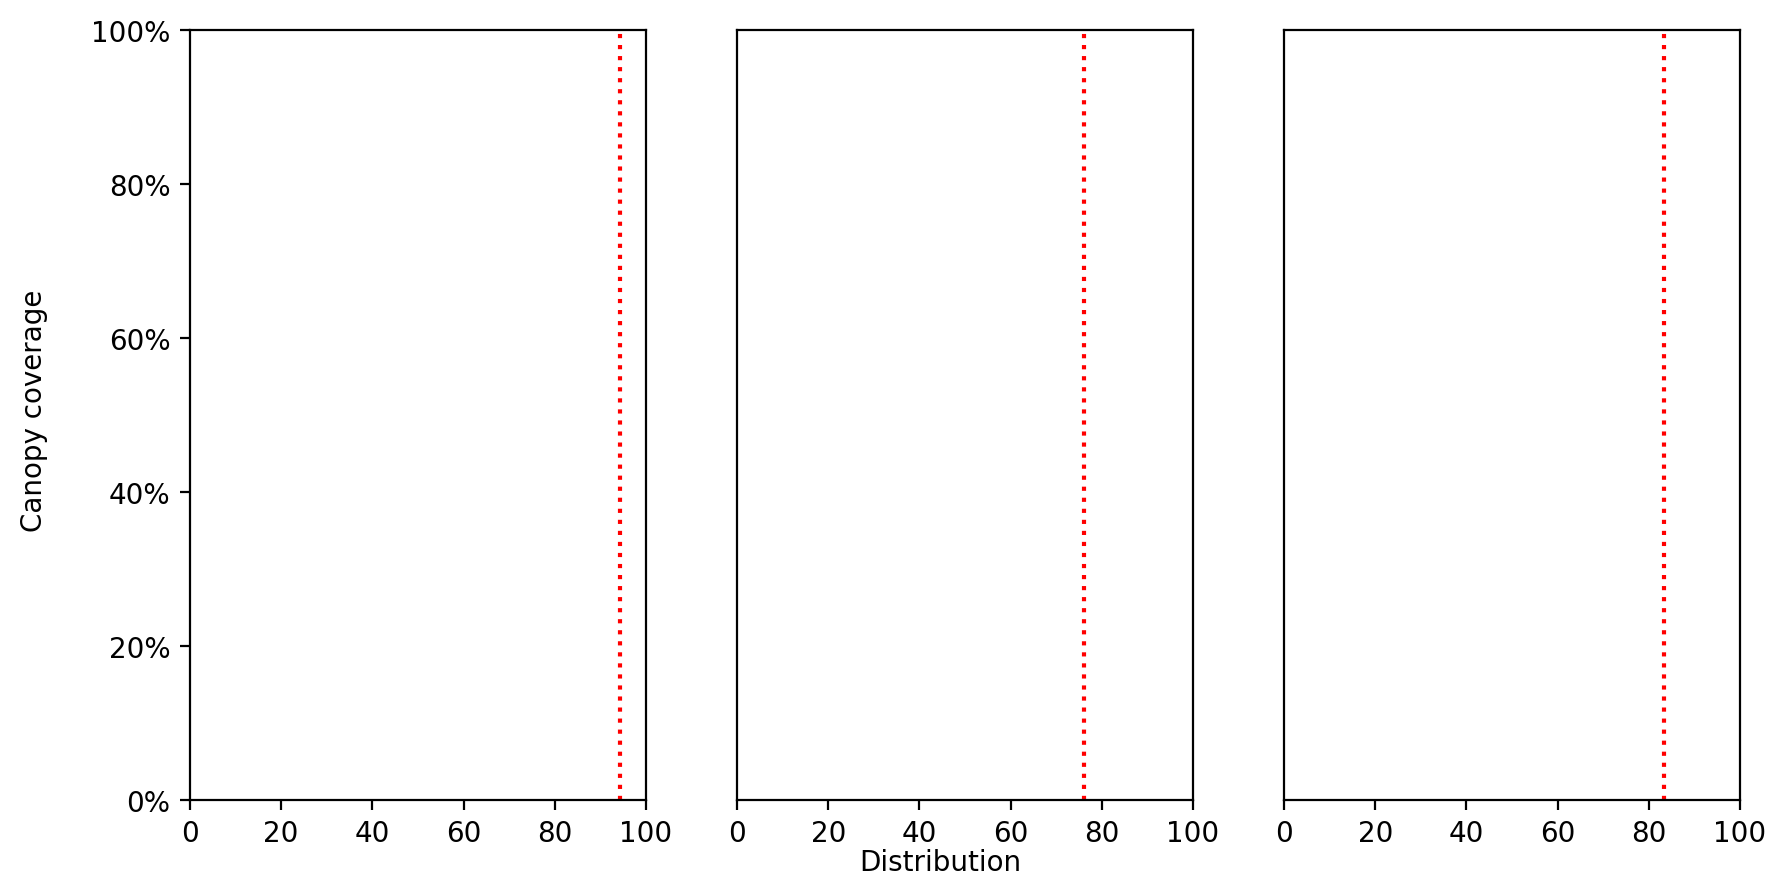

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
# post harvest
new_brunswick_coverage = new_brunswick_harvested['canopy_coverage']
sweden_coverage = sweden_harvested['canopy_coverage']
finland_coverage = finland_harvested['canopy_coverage']
# before harvest
new_brunswick_before = new_brunswick_reference['canopy_coverage']
sweden_before = sweden_reference['canopy_coverage']
finland_before = finland_reference['canopy_coverage']


nbins = 10
fig,ax = plt.subplots(1,3,figsize=(10,5),dpi=200,sharey=True)

fig.text(0.5, 0.04, 'Distribution', ha='center')
fig.text(0.04, 0.5, 'Canopy coverage', va='center', rotation='vertical')
#ax[0].hist(new_brunswick_coverage,density=False, weights=np.ones_like(new_brunswick_coverage)*100./ len(new_brunswick_coverage), color = 'red', edgecolor='black')
#ax[1].hist(sweden_coverage,density=False, weights=np.ones_like(sweden_coverage)*100./ len(sweden_coverage), color = 'yellow', edgecolor='black')
#ax[2].hist(finland_coverage,density=False, weights=np.ones_like(finland_coverage)*100./ len(finland_coverage), color = 'blue', edgecolor='black')
ax[1].set(yticklabels=[])
ax[2].set(yticklabels=[])
ax[1].tick_params(left=False)
ax[2].tick_params(left=False)
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=100))


# Set limits for x and y axis
x_limits = (0, 100)  # Example limits, change according to your data range
y_limits = (0, 100)   # Example limits, change according to your data range

for axi in ax:
    axi.set_xlim(x_limits)
    axi.set_ylim(y_limits)


#before lines
# nb
#ax[0].axvline(new_brunswick_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[0].axvline(new_brunswick_before.mean(),color='red',linestyle = 'dotted')
#ax[0].axvline(new_brunswick_before.quantile(0.75),color='red',linestyle = 'dotted')

# sweden
#ax[1].axvline(sweden_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[1].axvline(sweden_before.mean(),color='red',linestyle = 'dotted')
#ax[1].axvline(sweden_before.quantile(0.75),color='red',linestyle = 'dotted')
# finland
#ax[2].axvline(finland_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[2].axvline(finland_before.mean(),color='red',linestyle = 'dotted')
#ax[2].axvline(finland_before.quantile(0.75),color='red',linestyle = 'dotted')

# Lines and data

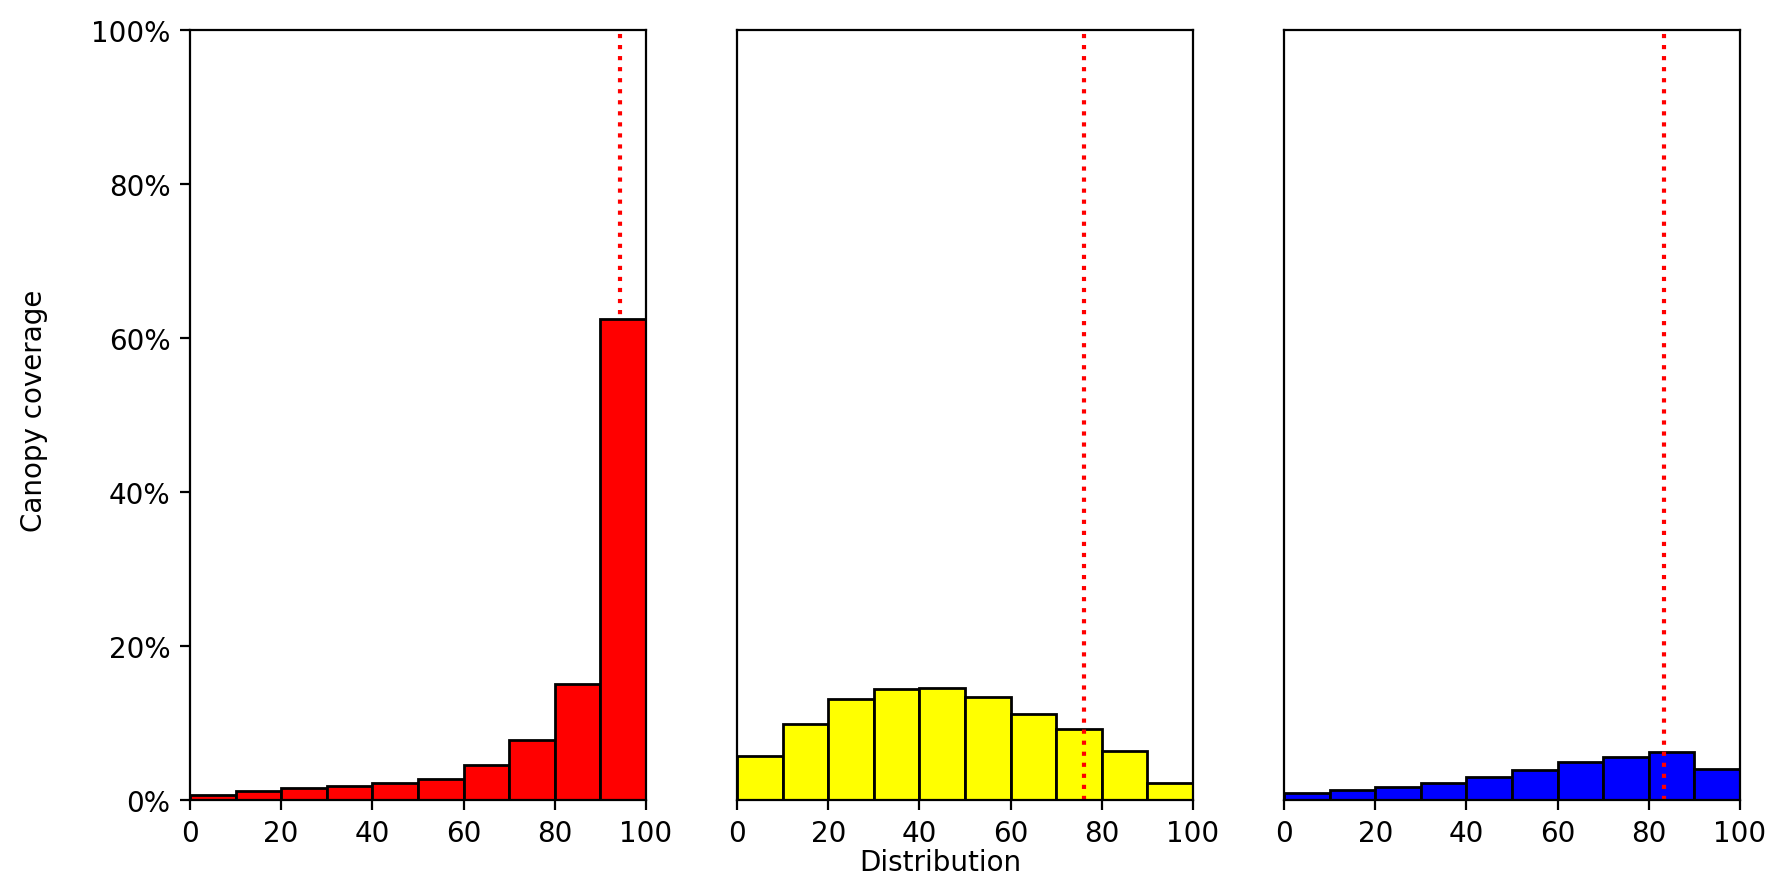

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
# post harvest
new_brunswick_coverage = new_brunswick_harvested['canopy_coverage']
sweden_coverage = sweden_harvested['canopy_coverage']
finland_coverage = finland_harvested['canopy_coverage']
# before harvest
new_brunswick_before = new_brunswick_reference['canopy_coverage']
sweden_before = sweden_reference['canopy_coverage']
finland_before = finland_reference['canopy_coverage']


nbins = 10
fig,ax = plt.subplots(1,3,figsize=(10,5),dpi=200,sharey=True)

fig.text(0.5, 0.04, 'Distribution', ha='center')
fig.text(0.04, 0.5, 'Canopy coverage', va='center', rotation='vertical')
ax[0].hist(new_brunswick_coverage,density=False, weights=np.ones_like(new_brunswick_coverage)*100./ len(new_brunswick_coverage), color = 'red', edgecolor='black')
ax[1].hist(sweden_coverage,density=False, weights=np.ones_like(sweden_coverage)*100./ len(sweden_coverage), color = 'yellow', edgecolor='black')
ax[2].hist(finland_coverage,density=False, weights=np.ones_like(finland_coverage)*100./ len(finland_coverage), color = 'blue', edgecolor='black')
ax[1].set(yticklabels=[])
ax[2].set(yticklabels=[])
ax[1].tick_params(left=False)
ax[2].tick_params(left=False)
ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=100))


# Set limits for x and y axis
x_limits = (0, 100)  # Example limits, change according to your data range
y_limits = (0, 100)   # Example limits, change according to your data range

for axi in ax:
    axi.set_xlim(x_limits)
    axi.set_ylim(y_limits)


#before lines
# nb
#ax[0].axvline(new_brunswick_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[0].axvline(new_brunswick_before.mean(),color='red',linestyle = 'dotted')
#ax[0].axvline(new_brunswick_before.quantile(0.75),color='red',linestyle = 'dotted')

# sweden
#ax[1].axvline(sweden_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[1].axvline(sweden_before.mean(),color='red',linestyle = 'dotted')
#ax[1].axvline(sweden_before.quantile(0.75),color='red',linestyle = 'dotted')
# finland
#ax[2].axvline(finland_before.quantile(0.25),color='red',linestyle = 'dotted')
ax[2].axvline(finland_before.mean(),color='red',linestyle = 'dotted')
#ax[2].axvline(finland_before.quantile(0.75),color='red',linestyle = 'dotted')

Tinker with ggplot using plotnine

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np
# post harvest
nb_coverage = nb_harvested['canopy_coverage']
sweden_coverage = sweden_harvested['canopy_coverage']
finland_coverage = finland_harvested['canopy_coverage']
# before harvest
nb_before = nb_reference['canopy_coverage']
sweden_before = sweden_reference['canopy_coverage']
finland_before = finland_reference['canopy_coverage']



nb_ref_mean = nb_reference['canopy_coverage'].mean()
(ggplot() +
 geom_histogram(aes(x=nb_coverage,y=stat(count/sum(count))),color='black',fill='red',alpha = .5)
 + labs(x='Distribution', y='Canopy coverage')
 #geom_histogram(nb_reference, aes(x='canopy_coverage'),alpha = .5)
 #+ geom_histogram(aes(x=nb_before))
 + geom_vline(xintercept=nb_reference['canopy_coverage'].quantile(0.25),color= 'red', linetype='dotted')
 + geom_vline(xintercept=nb_reference['canopy_coverage'].mean(),color='black')
 + geom_vline(xintercept=nb_reference['canopy_coverage'].quantile(0.75),color ='red', linetype='dotted')
)



NameError: ignored

In [ ]:
print(nb_reference['canopy_coverage'].quartile(0.25))
print(nb_reference['canopy_coverage'].mean())
print(nb_reference['canopy_coverage'].quantile(0.75))

AttributeError: ignored